In [1]:
%matplotlib inline
# Switch to ''%matplotlib ipympl' for interactive plots
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Initialise wrapper and test datasets
wrapper_fpath = (r"..\mobius.py")
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('..\..\Applications\IncaC\incac.dll')

# Calibration functions
calib_fpath = (r"..\mobius_calib_uncert_lmfit.py")
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [3]:
dataset = wr.DataSet.setup_from_parameter_and_input_files('..\..\Applications\IncaC\Storgama\params_Storgama_persist_optimized.dat', '..\..\Applications\IncaC\Storgama\inputs_Storgama.dat')

In [4]:
comparisons = [
    ('Reach flow', ['Storgama'], 'Observed flow', []),
    ('Reach DOC concentration', ['Storgama'], 'Observed DOC', [])
]

In [5]:
param_df = cu.get_double_parameters_as_dataframe(dataset)
pd.options.display.max_rows = 999
param_df

,name,unit,index,min_value,initial_value,max_value
0,Snow multiplier,dimensionless,"(All,)",5.000000e-01,1.000000e+00,1.500000e+00
1,Snow melt temperature,°C,"(All,)",-4.000000e+00,5.897721e-01,4.000000e+00
2,Degree day melt factor,mm/°C/day,"(All,)",1.000000e+00,2.344462e+00,4.000000e+00
3,Rain multiplier,dimensionless,"(All,)",5.000000e-01,1.000000e+00,1.500000e+00
4,Initial snow depth,mm SWE,"(All,)",0.000000e+00,0.000000e+00,9.999000e+03
5,Degree day evapotranspiration,mm/°C/day,"(All,)",5.000000e-02,1.576541e-01,2.000000e-01
6,Growing degree threshold,°C,"(All,)",-4.000000e+00,-1.000000e+00,4.000000e+00
7,Canopy interception,mm/day,"(All,)",0.000000e+00,0.000000e+00,3.000000e-01
8,Initial water depth,mm,"(Direct runoff, All)",0.000000e+00,0.000000e+00,9.999000e+03
9,Initial water depth,mm,"(Organic layer, All)",0.000000e+00,3.000000e+02,9.999000e+03



Goodness of fit for Reach flow [Storgama] vs Observed flow []:
Mean error (bias): -0.006311
Mean absolute error: 0.011068
Root mean square error: 0.026586
Nash-Sutcliffe coefficient: 0.348992
Number of observations: 10227


Goodness of fit for Reach DOC concentration [Storgama] vs Observed DOC []:
Mean error (bias): 0.221062
Mean absolute error: 1.148042
Root mean square error: 1.433401
Nash-Sutcliffe coefficient: -0.023741
Number of observations: 1411



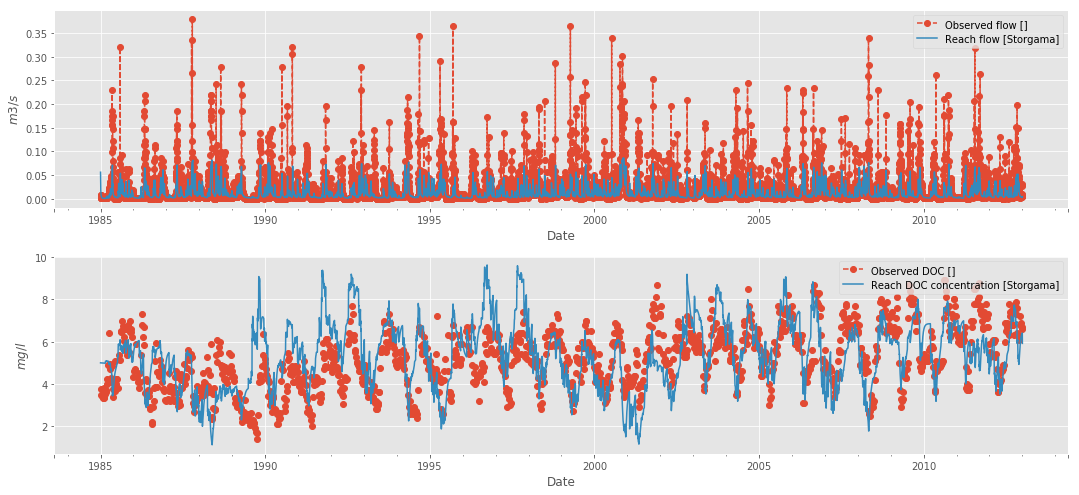

In [6]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

In [7]:
calib_df = param_df.loc[[1, 2, 5, 29, 30, 31, 47, 48, 61, 62, 66, 67,
                        85, #FFrac_o
                        86, #FFrac_m
                        87, #FRate_o
                        88, #FRate_m
                        89, #R10deg
                        #93, #SOCm_o
                        #94, #SOCm_m
                        95, #SOCd_o
                        96, #SOCd_m
                        97, #SOCs_o
                        98, #SOCs_m
                        #99, #DOCm_o
                        #100,#DOCm_m
                        ]].reset_index(drop=True)
calib_df

,name,unit,index,min_value,initial_value,max_value
0,Snow melt temperature,°C,"(All,)",-4.000,0.589772,4.0
1,Degree day melt factor,mm/°C/day,"(All,)",1.000,2.344462,4.0
2,Degree day evapotranspiration,mm/°C/day,"(All,)",0.050,0.157654,0.2
3,Time constant,days,"(Organic layer, All)",1.000,1.200000,9999.0
4,Time constant,days,"(Mineral layer, All)",1.000,17.000000,9999.0
5,Time constant,days,"(Groundwater, All)",1.000,176.049177,9999.0
6,a,1/m2,"(Storgama,)",0.001,0.017720,1.0
7,b,dimensionless,"(Storgama,)",0.300,0.428952,0.5
8,Percolation matrix,dimensionless,"(All, Organic layer, Organic layer)",0.000,0.700000,1.0
9,Percolation matrix,dimensionless,"(All, Organic layer, Mineral layer)",0.000,0.300000,1.0


In [8]:
calib_df['short_name'] = [
    'Tmelt',
    'DDfmelt',
    'DDFet',
    'T_o',
    'T_m',
    'T_g',
    'a',
    'b',
    'runoff_o',
    'baseflow_o',
    'runoff_m',
    'baseflow_m',
    'FFrac_o',
    'FFrac_m',
    'FRate_o',
    'FRate_m',
    'R10deg',
    #'SOCm_o',
    #'SOCm_m',
    'SOCd_o',
    'SOCd_m',
    'SOCs_o',
    'SOCs_m',
    #'DOCm_o',
    #'DOCm_m',
]

params = cu.parameter_df_to_lmfit(calib_df)

params['baseflow_o'].set(expr = '1.0-runoff_o')
params['baseflow_m'].set(expr = '1.0-runoff_m')
params['T_o'].min = 1.0
params['T_o'].max = 3.0
params['T_m'].min = 5.0
params['T_m'].max = 30.0
params['T_g'].min = 30.0
params['T_g'].max = 200.0

params

name,value,initial value,min,max,vary,expression
Tmelt,0.58977210,0.5897721042658725,-4.00000000,4.00000000,True,
DDfmelt,2.34446187,2.34446186778983,1.00000000,4.00000000,True,
DDFet,0.15765413,0.1576541297210521,0.05000000,0.20000000,True,
T_o,1.20000000,1.2,1.00000000,3.00000000,True,
T_m,17.0000000,17.0,5.00000000,30.0000000,True,
T_g,176.049177,176.049177433405,30.0000000,200.000000,True,
a,0.01772010,0.017720101492691213,1.0000e-03,1.00000000,True,
b,0.42895220,0.42895219814422125,0.30000000,0.50000000,True,
runoff_o,0.70000000,0.7000000000000001,0.00000000,1.00000000,True,
baseflow_o,0.30000000,0.30000000000000004,0.00000000,1.00000000,False,1.0-runoff_o


In [9]:
%%time
mi, res = cu.minimize_residuals(params, dataset, comparisons, method='nelder', norm=False, skip_timesteps=365)
print('Optimization results\n')
lmfit.report_fit(res)
print('\n\nOptimized parameter values:\n')
res.params.pretty_print(precision=3)

cu.set_parameter_values(res.params, dataset)
dataset.write_parameters_to_file('optimized_params.dat')

Optimization results

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 5661
    # data points      = 11223
    # variables        = 19
    chi-square         = 1566.70784
    reduced chi-square = 0.13983469
    Akaike info crit   = -22059.9607
    Bayesian info crit = -21920.7720
##  Warning: uncertainties could not be estimated:
[[Variables]]
    Tmelt:       0.07860688 +/-        nan (nan%) (init = 0.5897721)
    DDfmelt:     2.42728497 +/-        nan (nan%) (init = 2.344462)
    DDFet:       0.18456607 +/- 0.00111205 (0.60%) (init = 0.1576541)
    T_o:         1.38667187 +/- 0.18297460 (13.20%) (init = 1.2)
    T_m:         17.0770918 +/- 1.32202033 (7.74%) (init = 17)
    T_g:         134.197281 +/-        nan (nan%) (init = 176.0492)
    a:           0.00276845 +/-        nan (nan%) (init = 0.0177201)
    b:           0.44271670 +/-        nan (nan%) (init = 0.4289522)
    runoff_o:    0.77815643 +/-        nan (nan%) (init = 0.7)
    baseflow_o:  0


Goodness of fit for Reach flow [Storgama] vs Observed flow []:
Mean error (bias): -0.006973
Mean absolute error: 0.014509
Root mean square error: 0.031499
Nash-Sutcliffe coefficient: 0.086154
Number of observations: 10227


Goodness of fit for Reach DOC concentration [Storgama] vs Observed DOC []:
Mean error (bias): -0.039723
Mean absolute error: 0.835173
Root mean square error: 1.062830
Nash-Sutcliffe coefficient: 0.437163
Number of observations: 1411



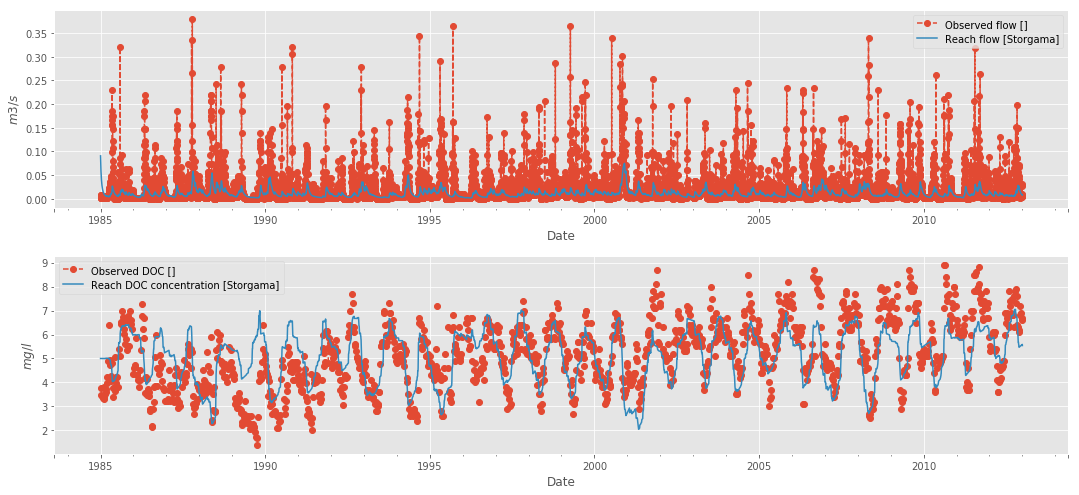

In [10]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)